In [1]:
from scipy import stats
import numpy as np
from scipy.optimize import minimize
import pylab as py
from scipy.optimize import minimize
from scipy import stats
import pandas as pd
from statistics import stdev, mean

In [40]:
def arma(params, ypredlist = False):
    c = params[0]

    # auto-regressive parameter for lag
    gamma = params[1]
    # moving-average parameter for lag
    theta = params[2]

    # standardDeviation param
    sd = params[3]

    # supposed to be a random number off of normal distribution or somethin
    # is acting as white noise though
    errorTerm = 0 #np.random.normal(0, sd**2)

    # idk about this? lol
    laggederror = 1

    yPred = []
    for i in range(0, len(ydata)-2):
        yPred.append(0)

    for i in range(1, len(ydata)-1):
        # here we are getting a predicted value from previous values
        yPred[i-1] = c + errorTerm + (gamma * ydata[i-1]) + (theta * laggederror)
        # here we calculate the error of that prediction
        laggederror = abs(yPred[i-1] - ydata[i])

    # calculate likelihood
    LL = -np.sum(stats.norm.logpdf(ydata[1:len(ydata)-1], loc=yPred, scale=sd))
    
    if ypredlist:
        return yPred
    
    return LL


In [3]:
def fit(p=1, q=1):
    # these vary based on how many parameters you need for your model
    # so like for a ARMA(1,1) you need 4 params

    # set as such:
    # param[0] = c
    #
    # param[1] = gamma
    # param[2] = theta
    # param[3] = standardDev

    initParams = [1] * 4

    # the heavy lifting, need to understand at some point lol
    results = minimize(arma, initParams, method='Nelder-Mead')
    print(results.x)

    estimatedParams = results.x
    return estimatedParams

# Running the ARMA on the full dataset:

In [4]:
data = pd.read_csv("testData.csv")
ydata = data['Births'].to_list()

In [5]:
params = fit()

[32.28925219  0.24829734 -0.14286774  7.1363243 ]


In [6]:
yPred = arma(params, True)
xvals = list(range(len(yPred)))

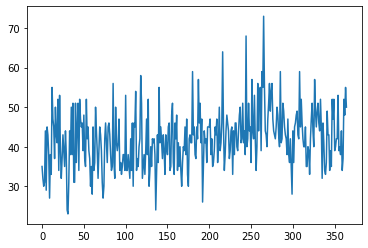

In [7]:
py.clf()
py.plot(list(range(len(ydata))), ydata)
py.show()

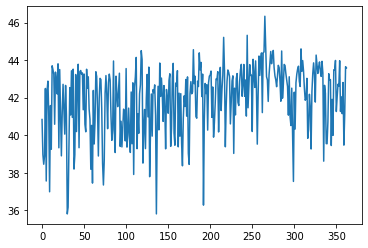

In [8]:
py.plot(xvals, yPred)

In [9]:
print(mean(yPred))
print(mean(ydata))

41.90842948197984
41.98082191780822


# Training the ARMA and then testing accuracy:

In [15]:
# once again, our dataset
print(data.head())
print("\n# of values: " + str(len(data)))

         Date  Births
0  1959-01-01      35
1  1959-01-02      32
2  1959-01-03      30
3  1959-01-04      31
4  1959-01-05      44

# of values: 365


In [47]:
# we'll split the data set
train = data.iloc[1:340]
test = data.iloc[340:len(data)]

In [48]:
# fit the model on the training data set
ydata = train['Births'].to_list()
paramsTrain = fit()

[32.46274272  0.24337833 -0.14186534  7.18722004]


In [49]:
# Create the actual predicted values 
ydata = test['Births'].to_list()
yPred = arma(paramsTrain, True)
# Generate time values for above data
xvals = list(range(len(yPred)))

# Should be length of training set
len(yPred)

23

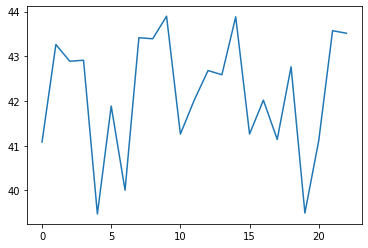

In [50]:
py.plot(xvals, yPred)

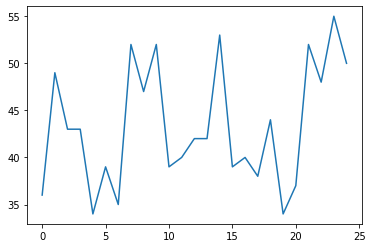

In [51]:
py.plot(list(range(len(test))), test['Births'])

# Calculate the Mean Absolute Percentage Error (MAPE)